# TORCH AUDIO

Sound is created via the vibration of air. All the sounds we hear are combinations of high and low pressure that we often represent in a waveform

## IMPORTS

In [6]:
import IPython.display as display
import torchaudio
import matplotlib.pyplot as plt

## SOUND DATA

### Characteristics of Sound Data

1. __waveform__: a visual representation of sound as amplitude (loudness) versus time
2. __Frequency__: The number of vibrations per second, measured in HZ, it determines pitch
3. __Amplitude__: The height of the sound wave, which corresponds to volume.
4. __Sampling Rate__: The number of samples per second, usually measured in kilohertz (kHz). Common rates are 16 kHz, 44.1 kHz, etc.
5. __Bit Depth__: Determines the resolution of the sound. Common values include 16-bit and 24-bit.


In [5]:
data = "/kaggle/input/environmental-sound-classification-esc-dataset/ESC-50/audio"
single = "/kaggle/input/environmental-sound-classification-esc-dataset/ESC-50/audio/1-104089-B-22.wav"
display.Audio(single)

`torchaudio.load()` - it returns:

- __waveform__ - A pytorch tensor containing the audio data
- __sample rate__ - An integer representing the sampling rate, it indicates the number of audio samples per second. 

In [11]:
waveform, sampling_rate = torchaudio.load(single)
print("Waveform shape: ", waveform.shape)
print("Sampling rate: ", sampling_rate)

Waveform shape:  torch.Size([1, 220500])
Sampling rate:  44100


The above .wav has a shape [1, 220500], this means: it has one (mono) channel, with 220, 500 frames. The duration of the audio in seconds can then be calculated as:
$
\text{duration} = \frac{\text{Number of sample}}{\text{sampling rate}}
$

For our case above: 

$
\text{duration} = \frac{220500}{44100} = 5
$

The difference between mono and stereo audio lies in how sound is captured, stored, and played back, as well as how it creates the perception of sound for the listener.

A __single audio signal__ means the same audio signal is sent to all speakers or headphones. If you're listening to a mono recording, both your left and right ears (via headphones) will hear identical audio.

For a __stereo audio signal__ it uses two or more channels to record and reproduce sound. Separate audio signals for the left and right speakers or headphones.


The __sampling rate__ refers to how many samples of an audio signal are taken per second when converting an analog signal (continuous) into a digital signal (discrete). It is measured in Hertz (Hz), which means samples per second. A higher sampling rate captures more detail of the sound, while a lower rate reduces the file size but sacrifices some audio quality.

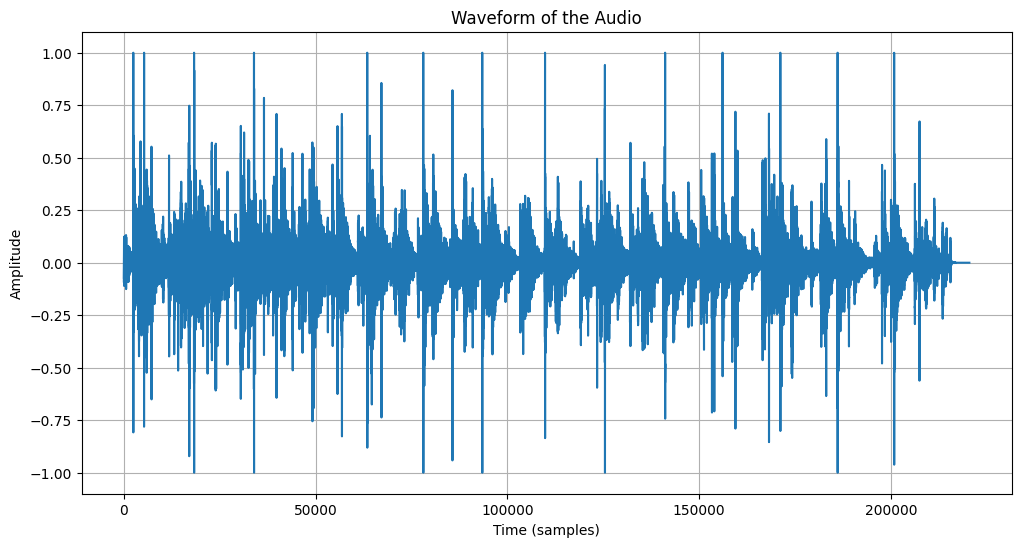

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(waveform.t().numpy()) # .numpy() converts the pytorch tensor into a numpy array.
plt.title('Waveform of the Audio')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

The x axis plots the 220, 500 samples we saw when we ran the `waveform.shape`, with the y axis showing how loud each frame is

### Nyquist Theorem

The Nyquist Theorem states that to avoid losing high-frequency information and to accurately reconstruct a signal, the sampling rate must be at least twice the highest frequency in the signal.

__For example__, if the highest frequency in an audio signal is 20 kHz (the upper limit of human hearing), the sampling rate needs to be at least 40 kHz.

## PRE-PROCESSING SOUND DATA

